In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.utils import shuffle
from algs_lib import *
from math import comb

# K-MEANS

In [23]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times']})
plt.rcParams["font.family"] = "Helvetica"

rc('text', usetex=True)

In [3]:
fname = 'final/bean_kmeans_acc_bal=False_mi={}_formatted.pkl'
pickle.load(open(fname.format(1/128), 'rb'))

{0.0078125: (0.7075601273573353,
  0.005250676132268651,
  0.1552255694342395,
  0.0012293381717075795)}

ind=0
[0.9512857142857142, 0.9512857142857142, 0.9512857142857142, 0.9512857142857142, 0.9512857142857142, 0.9512857142857142, 0.9512857142857142, 0.9512857142857142, 0.9512857142857142, 0.9512857142857142]
[0.6739795918367347, 0.7462448979591837, 0.8173469387755101, 0.8691836734693879, 0.9245510204081632, 0.9453469387755101, 0.9506326530612246, 0.951795918367347, 0.9519591836734694, 0.9508367346938776]
-----
ind=1
[0.9072302977232926, 0.9072302977232926, 0.9072302977232926, 0.9072302977232926, 0.9072302977232926, 0.9072302977232926, 0.9072302977232926, 0.9072302977232926, 0.9072302977232926, 0.9072302977232926]
[0.8689430823117339, 0.8920919439579684, 0.9005814360770578, 0.9043931698774081, 0.9061663747810857, 0.9064098073555167, 0.9067907180385288, 0.9070043782837128, 0.9069448336252189, 0.906976357267951]
-----
ind=2
[0.714036247856968, 0.714036247856968, 0.714036247856968, 0.714036247856968, 0.714036247856968, 0.714036247856968, 0.714036247856968, 0.714036247856968, 0.7140362478569

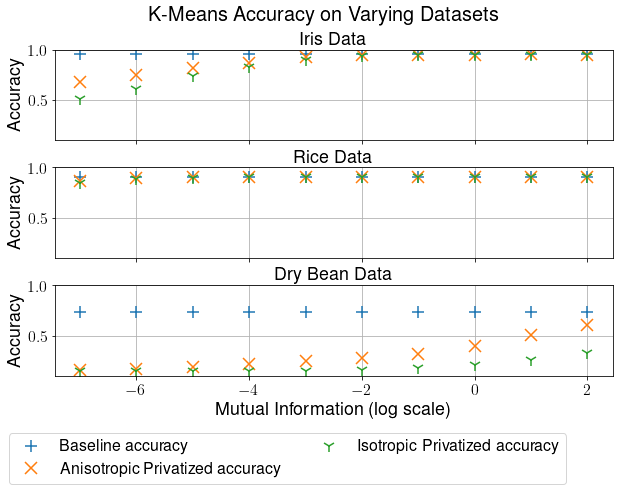

In [28]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
hybrid_fnames = ["final/iris_kmeans_acc_bal=False.pkl",
                "final/rice_kmeans_acc_bal=False.pkl",
                "final/bean_kmeans_acc_bal=False_mi={}_formatted.pkl"]
iso_fnames = ["final/iris_iso_kmeans_acc_bal=False.pkl",
             "final/rice_iso_kmeans_acc_bal=False.pkl",
             "final/bean_iso_kmeans_acc_bal=False_mi={}_formatted.pkl"]

baseline_vals = [0.9591836734693877, 0.9071803852889667, 0.7340191036002939]
data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))



for ind, data in enumerate(data_types):

    print(f'ind={ind}')
    if ind < 2:
        hybrid_acc_dict = pickle.load(open(hybrid_fnames[ind], 'rb'))
        iso_acc_dict = pickle.load(open(iso_fnames[ind], 'rb'))
    else:

        hybrid_acc_dict, iso_acc_dict = {}, {}
        for mi in true_x_vals:
            hybrid_acc_dict[mi] = pickle.load(open(hybrid_fnames[ind].format(mi), 'rb'))[mi]
            iso_acc_dict[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[mi]

    ax = axes[ind]
    sorted_keys = true_x_vals
    subsampling_ys = [max(hybrid_acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print(subsampling_ys)
    
    hybrid_priv_ys = [hybrid_acc_dict[k][2] for k in sorted_keys]
    iso_priv_ys = [iso_acc_dict[k][2] for k in sorted_keys]
    print(hybrid_priv_ys)
    print('-----')
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [baseline_vals[ind]]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline accuracy")
#     ax.plot(transformed_x_vals, [baseline_vals[ind]]*len(transformed_x_vals), '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    
    y_min, y_max = 0.1, 1.0
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("K-Means Accuracy on Varying Datasets", fontsize=20)

plt.savefig('figs/mi_kmeans_naive.svg', bbox_inches = "tight")


ind=0
[0.9513265306122448, 0.9513265306122448, 0.9513265306122448, 0.9513265306122448, 0.9513265306122448, 0.9513265306122448, 0.9513265306122448, 0.9513265306122448, 0.9513265306122448, 0.9513265306122448]
[0.6628775510204082, 0.7498775510204082, 0.8159591836734694, 0.8826530612244897, 0.9261224489795918, 0.9475714285714284, 0.9519795918367348, 0.9519387755102041, 0.9514285714285714, 0.950938775510204]
ind=1
[0.9068388791593696, 0.9068388791593696, 0.9068388791593696, 0.9068388791593696, 0.9068388791593696, 0.9068388791593696, 0.9068388791593696, 0.9068388791593696, 0.9068388791593696, 0.9068388791593696]
[0.8582451838879159, 0.8881068301225918, 0.8978388791593696, 0.9024518388791594, 0.9045674255691769, 0.905353765323993, 0.9057259194395798, 0.9061961471103327, 0.9063406304728546, 0.9064220665499124]
ind=2
[0.8494452608376194, 0.8494452608376194, 0.8494452608376194, 0.8494452608376194, 0.8494452608376194, 0.8494452608376194, 0.8494452608376194, 0.8494452608376194, 0.8494452608376194,

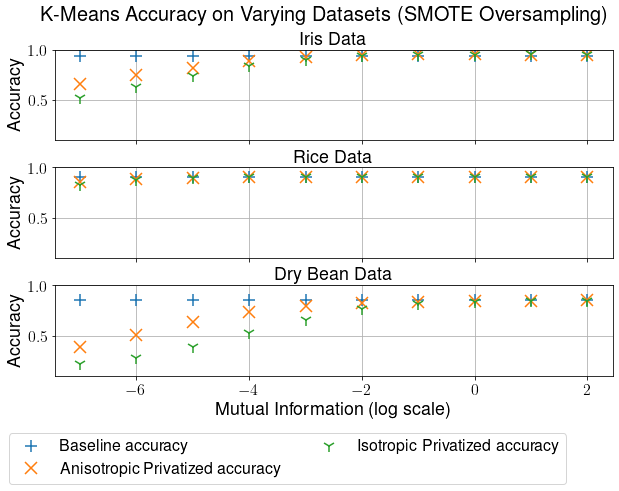

In [29]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
hybrid_fnames = ["final/iris_kmeans_acc_bal=True.pkl",
                "final/rice_kmeans_acc_bal=True.pkl",
                "final/bean_kmeans_acc_bal=True_mi={}.pkl"]
iso_fnames = ["final/iris_iso_kmeans_acc_bal=True.pkl",
             "final/rice_iso_kmeans_acc_bal=True.pkl",
             "final/bean_iso_kmeans_acc_bal=True_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.9387755102040817, 0.9089316987740805, 0.8493754592211609]


for ind, data in enumerate(data_types):
#     if ind >= 2: continue
    print(f'ind={ind}')
    if ind < 2:
        hybrid_acc_dict = pickle.load(open(hybrid_fnames[ind], 'rb'))
        iso_acc_dict = pickle.load(open(iso_fnames[ind], 'rb'))
    else:

        hybrid_acc_dict, iso_acc_dict = {}, {}
        for mi in true_x_vals:
            hybrid_acc_dict[mi] = pickle.load(open(hybrid_fnames[ind].format(mi), 'rb'))[mi]
            iso_acc_dict[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[mi]

    ax = axes[ind]
    sorted_keys = true_x_vals

    hybrid_priv_ys = [hybrid_acc_dict[k][2] for k in sorted_keys]
    iso_priv_ys = [iso_acc_dict[k][2] for k in sorted_keys]
    subsampling_ys = [max(hybrid_acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    print(subsampling_ys)
#     hybrid_priv_ys = [hybrid_acc_dict[k][2] for k in sorted_keys]
    print(hybrid_priv_ys)
#     iso_priv_ys = [iso_acc_dict[k][2] for k in sorted_keys]
#     print(subsampling_ys)
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [baseline_vals[ind]]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    
    y_min, y_max = 0.1, 1.0
    ax.set_ylim(y_min, y_max)
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("K-Means Accuracy on Varying Datasets (SMOTE Oversampling)", fontsize=20)

plt.savefig('figs/mi_kmeans_balanced.svg', bbox_inches = "tight")


# SVM

Iris Data
[0.9503673469387844, 0.9503673469387844, 0.9503673469387844, 0.9503673469387844, 0.9503673469387844, 0.9503673469387844, 0.9503673469387844, 0.9503673469387844, 0.9503673469387844, 0.9503673469387844]
[0.41512244897959116, 0.44879591836734667, 0.4853877551020412, 0.5483877551020406, 0.6120612244897962, 0.6942653061224494, 0.7710408163265337, 0.8416122448979677, 0.8941632653061331, 0.9233265306122557]
---
Rice Data
[0.9259754816111958, 0.9259754816111958, 0.9259754816111958, 0.9259754816111958, 0.9259754816111958, 0.9259754816111958, 0.9259754816111958, 0.9259754816111958, 0.9259754816111958, 0.9259754816111958]
[0.5750271453590181, 0.6138467600700528, 0.6586374781085806, 0.7071646234675998, 0.7442486865148857, 0.8051243432574416, 0.849252189141855, 0.882503502626969, 0.8986663747810836, 0.9105017513134822]
---
Dry Bean
[0.9178848885623319, 0.9178848885623319, 0.9178848885623319, 0.9178848885623319, 0.9178848885623319, 0.9178848885623319, 0.9178848885623319, 0.9178848885623319

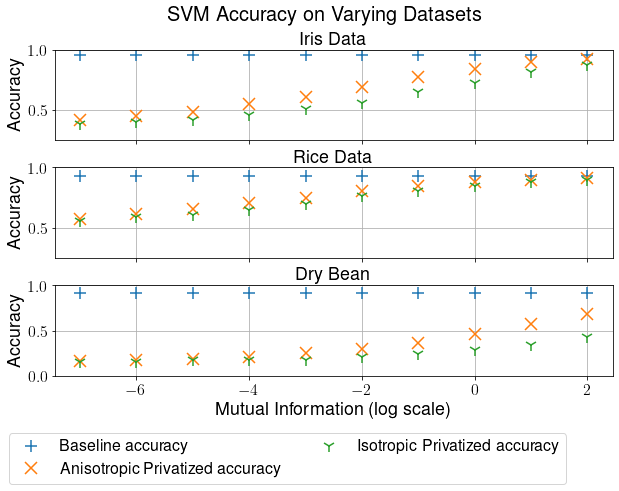

In [30]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
baseline_vals = [0.9591836734693877, 0.9273204903677759, 0.9191770756796473]

fnames = ["final/iris_acc_mi={}.pkl",
          "final/rice_acc_mi={}.pkl",
         "final/bean_acc_mi={}.pkl"]

iso_fnames = ["final/iris_iso_acc_mi={}.pkl",
          "final/rice_iso_acc_mi={}.pkl",
             "final/bean_iso_acc_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data", "Rice Data", "Dry Bean"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))


# reg = 0.05
C_vals = [1.0, 1.0, 1.0]
ys = [(0.25, 1.), (0.25, 1.), (0, 1)]

for ind, data in enumerate(data_types):

    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[C_vals[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[C_vals[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = true_x_vals
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(titles[ind])
    print(subsampling_ys)
    print(hybrid_priv_ys)
    print('---')
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [baseline_vals[ind]]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0.25, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("SVM Accuracy on Varying Datasets", fontsize=20)
plt.savefig('figs/mi_svm_naive.svg', bbox_inches = "tight")

Iris Data ($C=10^{-6}$)
[0.7761632653061274, 0.7761632653061274, 0.7761632653061274, 0.7761632653061274, 0.7761632653061274, 0.7761632653061274, 0.7761632653061274, 0.7761632653061274, 0.7761632653061274, 0.7761632653061274]
[0.4659795918367343, 0.5250816326530611, 0.5791020408163269, 0.6385510204081628, 0.7063673469387741, 0.738489795918369, 0.7596734693877563, 0.763857142857144, 0.769346938775511, 0.7714081632653087]
---
Rice Data ($C=10^{-6}$)
[0.9065595446584833, 0.9065595446584833, 0.9065595446584833, 0.9065595446584833, 0.9065595446584833, 0.9065595446584833, 0.9065595446584833, 0.9065595446584833, 0.9065595446584833, 0.9065595446584833]
[0.8926672504378287, 0.8985779334500869, 0.9026760070052539, 0.904449211908931, 0.9058082311733779, 0.9060980735551621, 0.9063511383537585, 0.9064999999999914, 0.9063765323992894, 0.9065236427320387]
---
Dry Bean ($C=10^{-3}$)
[0.8575491060494722, 0.8575491060494722, 0.8575491060494722, 0.8575491060494722, 0.8575491060494722, 0.8575491060494722, 

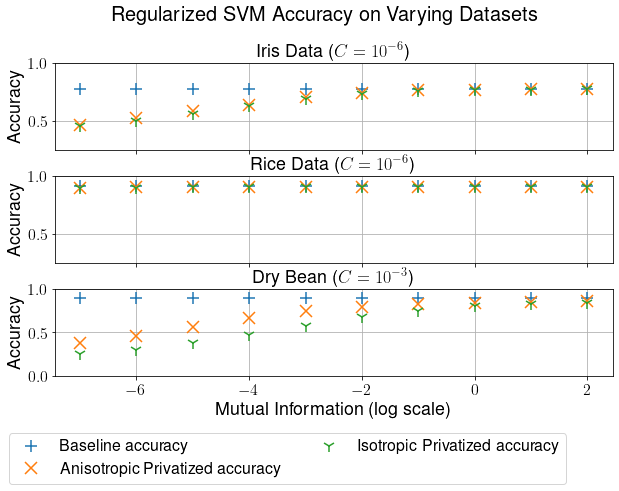

In [31]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]

fnames = ["final/iris_acc_mi={}.pkl",
          "final/rice_acc_mi={}.pkl",
         "final/bean_acc_mi={}.pkl"]

iso_fnames = ["final/iris_iso_acc_mi={}.pkl",
          "final/rice_iso_acc_mi={}.pkl",
             "final/bean_iso_acc_mi={}.pkl"]

data_types = ['iris', 'rice', 'bean']
titles = ["Iris Data ($C=10^{-6}$)", "Rice Data ($C=10^{-6}$)", "Dry Bean ($C=10^{-3}$)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
baseline_vals = [0.7755102040816326, 0.9071803852889667, 0.8907665931912809]
# reg = 0.05
C_vals = [1e-6, 1e-6, 0.001]
ys = [(0.25, 1.), (0.25, 1.), (0, 1)]
# 

for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[C_vals[ind]]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[C_vals[ind]]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(titles[ind])
    print(subsampling_ys)
    print(hybrid_priv_ys)
    print('---')
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [baseline_vals[ind]]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
#     y_min, y_max = 0.25, 1.0
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Regularized SVM Accuracy on Varying Datasets", fontsize=20)

plt.savefig('figs/mi_svm_reg.svg', bbox_inches = "tight")

# RF

nonprivate [0.9027142857142991, 0.9027142857142991, 0.9027142857142991, 0.9027142857142991, 0.9027142857142991, 0.9027142857142991, 0.9027142857142991, 0.9027142857142991, 0.9027142857142991, 0.9027142857142991]
aniso [0.43497959183673174, 0.46265306122448757, 0.4973265306122424, 0.5387551020408157, 0.5727346938775494, 0.6238163265306111, 0.6716938775510203, 0.7275714285714298, 0.771326530612249, 0.8109591836734764]
nonprivate [0.913335376532399, 0.913335376532399, 0.913335376532399, 0.913335376532399, 0.913335376532399, 0.913335376532399, 0.913335376532399, 0.913335376532399, 0.913335376532399, 0.913335376532399]
aniso [0.6014054290718037, 0.6553931698774089, 0.6823905429071803, 0.7376654991243421, 0.7814299474605957, 0.8317399299474598, 0.8614378283712786, 0.8849859894921193, 0.897096322241681, 0.9055788091068305]


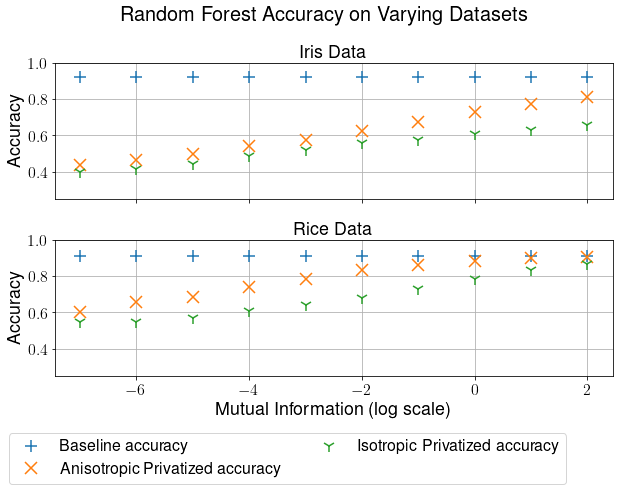

In [32]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(None, 0.0, 1.0), (None, 0, 1.0)]
norms = ['power', 'minmax']
fnames = ["final/iris_acc_auto_reg=(None, 0.0, 1.0)_mi=0.0078125_norm=power.pkl",
          "final/rice_acc_iso=False_auto_reg=(None, 0.0, 1.0)_mi={}_norm=minmax.pkl"
         ]
# iris_iso_acc_auto_reg=(0.01, 0.1, 0.95)_mi=0.015625.pkl	
iso_fnames = ["final/iris_iso_acc_auto_reg=(None, 0.0, 1.0)_mi=0.0078125_norm=power.pkl",
              "final/rice_acc_iso=True_auto_reg=(None, 0.0, 1.0)_mi={}_norm=minmax.pkl"
             ]

data_types = ['iris', 'rice']
titles = ["Iris Data", "Rice Data"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 6))
ys = [(0.25, 1.), (0.25, 1.)]

baseline_vals = [0.9183673469387755, 0.9115586690017513]


for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[(norms[ind], mi)]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[(norms[ind], mi)]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('nonprivate', subsampling_ys)
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [baseline_vals[ind]]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Random Forest Accuracy on Varying Datasets", fontsize=20)
plt.savefig('figs/dt_naive.svg', bbox_inches = "tight")

iris
nonprivate [0.883387755102058, 0.883387755102058, 0.883387755102058, 0.883387755102058, 0.883387755102058, 0.883387755102058, 0.883387755102058, 0.883387755102058, 0.883387755102058, 0.883387755102058]
aniso [0.7993673469387809, 0.8321836734693981, 0.858530612244911, 0.8736938775510342, 0.8859387755102184, 0.8907959183673623, 0.8905714285714441, 0.8911836734694033, 0.8893061224489957, 0.8876122448979757]
rice
nonprivate [0.9129343257443111, 0.9129343257443111, 0.9129343257443111, 0.9129343257443111, 0.9129343257443111, 0.9129343257443111, 0.9129343257443111, 0.9129343257443111, 0.9129343257443111, 0.9129343257443111]
aniso [0.9120586690017536, 0.9121549912434351, 0.9130481611208429, 0.9129360770577962, 0.9134798598949244, 0.9129886164623501, 0.9129290718038551, 0.9130070052539425, 0.9123397548161131, 0.9126479859894937]


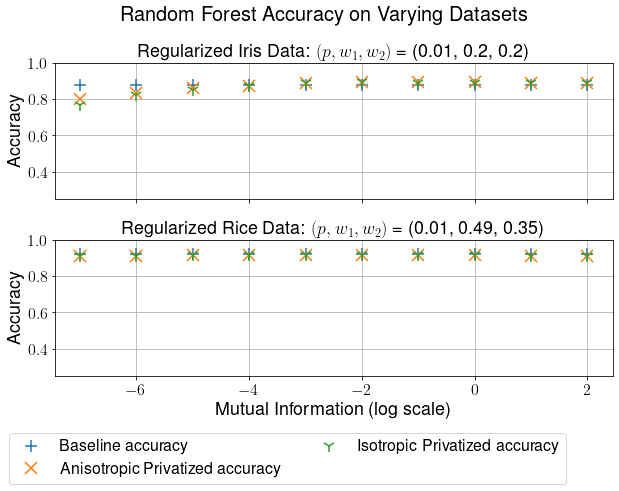

In [33]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
norms = ['robust', 'standard']
regs = [(0.01, 0.2, 0.2), (0.01, 0.49, 0.35)]
# max precision, reg param, weight orig in code
# max precision, 1-weight orig, reg param in writing
fnames = ["final/iris_acc_auto_reg=(0.01, 0.2, 0.8)_mi=0.0078125_norm=robust.pkl",
          "final/rice_acc_auto_reg=(0.01, 0.35, 0.51)_mi={}_norm=standard.pkl", 
         ]
# iris_iso_acc_auto_reg=(0.01, 0.1, 0.95)_mi=0.015625.pkl	
iso_fnames = ["final/iris_iso_acc_auto_reg=(0.01, 0.2, 0.8)_mi=0.0078125_norm=robust.pkl",
              "final/rice_acc_auto_reg=(0.01, 0.35, 0.51)_mi={}_norm=standard.pkl"
             ]

data_types = ['iris', 'rice']
titles = [f"Regularized Iris Data: $(p, w_1, w_2)$ = {regs[0]}",
          f"Regularized Rice Data: $(p, w_1, w_2)$ = {regs[1]}"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 6))
baseline_vals = [0.8775510204081632, 0.9185639229422067]



for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[(norms[ind], mi)]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[(norms[ind], mi)]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print(data)
    print('nonprivate', subsampling_ys)
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [baseline_vals[ind]]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0.25, 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Random Forest Accuracy on Varying Datasets", fontsize=20)
plt.savefig('figs/dt_reg.svg', bbox_inches = "tight")

# PCA

In [4]:
# CIFAR-10 RESULTS
d_iso = {1:
         {4.0: (0.3899007380447823, 0.39262130197103773),
          2.0: (0.3899007380447823, 0.3953232504796228),
          1.0: (0.3899007380447823, 0.4006884030062939),
          0.5: (0.3899007380447823, 0.4111956402559936),
          0.25: (0.3899007380447823, 0.4314666700050296),
          0.125: (0.3899007380447823, 0.46941987748510217),
          0.0625: (0.3899007380447823, 0.536983199926381),
          0.03125: (0.3899007380447823, 0.6528417820075811),
          0.015625: (0.3899007380447823, 0.8378517576532992),
          0.0078125: (0.3899007380447823, 1.124497074198604)
          
         },
     3:  {4.0: (0.3366523083424213, 0.3835553037136235),
          2.0: (0.3366523083424213, 0.42536836212948814),
          1.0: (0.3366523083424213, 0.4988086147382795),
          0.5: (0.3366523083424213, 0.6204695761349821),
          0.25: (0.3366523083424213, 0.8114802190329318),
          0.125: (0.3366523083424213, 1.1036491200022258),
          0.0625: (0.3366523083424213, 1.5397424736311718),
          0.03125: (0.3366523083424213, 2.19308247344792),
          0.015625: (0.3366523083424213, 3.1764506958776457),
          0.0078125: (0.3366523083424213, 4.820385147847908)
         }
    }

d_aniso = {
    1:
        {4.0: (0.3899007380447823, 0.39196632235943973),
         2.0: (0.3899007380447823, 0.3940194517854539),
         1.0: (0.3899007380447823, 0.39809269071925674),
         0.5: (0.3899007380447823, 0.40610919291335607),
         0.25: (0.3899007380447823, 0.4217299544898107),
         0.125: (0.3899007380447823, 0.45144737241868027),
         0.0625: (0.3899007380447823, 0.5055578372616198),
         0.03125: (0.3899007380447823, 0.5994318471658715),
         0.015625: (0.3899007380447823, 0.7556859377676132),
         0.0078125: (0.3899007380447823, 0.9934731976396258)
         
            
        },
    3: {4.0: (0.3366523083424213, 0.3551571778027461),
        2.0: (0.3366523083424213, 0.3727451646901534),
        1.0: (0.3366523083424213, 0.40578590176437235),
        0.5: (0.3366523083424213, 0.4650214139223454),
        0.25: (0.3366523083424213, 0.5656095199713769),
        0.125: (0.3366523083424213, 0.7285368044171248),
        0.0625: (0.3366523083424213, 0.9779755286654926),
        0.03125: (0.3366523083424213, 1.3618868594803006),
        0.015625: (0.3366523083424213, 1.9478993250508303),
        0.0078125: (0.3366523083424213, 2.900318405885795)
    }
}

0
Rice
[0.20247500904463006, 0.1935808450563184, 0.1892627962045168, 0.18707994718888965, 0.18603279694601302, 0.18544259219365844, 0.18517842082134836, 0.1850591534605888, 0.1849846056070965, 0.1849678516968494]
[0.2456150198438839, 0.21799183895306987, 0.20223627882782103, 0.19361416015834254, 0.18930538611985162, 0.18719457693250502, 0.18607096154610084, 0.18547794108731847, 0.1852133521702108, 0.18506374011567625]
1
Bean
[0.22373277285078538, 0.1975228035804716, 0.18387283315540753, 0.17681639252056547, 0.17279198978651203, 0.17098286669294474, 0.1699806051554544, 0.16951096952913156, 0.1692527538290967, 0.16912210189492036]
[0.24671080283049482, 0.2103345764589095, 0.19079371633852024, 0.1800529286687692, 0.1747619401867209, 0.17190288647275345, 0.1704663405203091, 0.1697222137264376, 0.16935075242176484, 0.16918545579045685]
2
CIFAR-10
[0.9934731976396258, 0.7556859377676132, 0.5994318471658715, 0.5055578372616198, 0.45144737241868027, 0.4217299544898107, 0.40610919291335607, 0.3

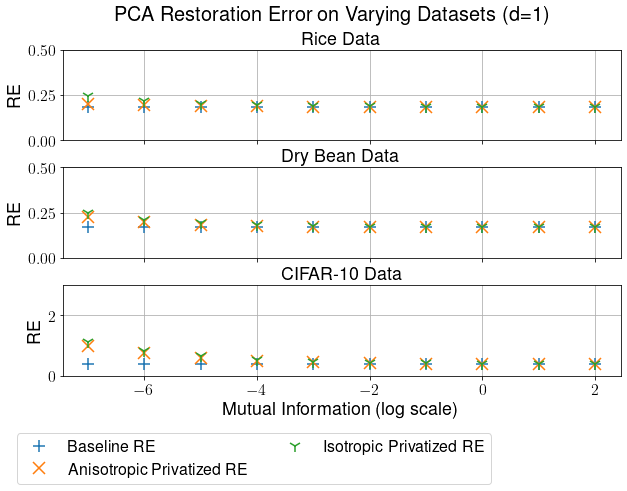

In [24]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2., 4.0]
# 
baseline_vals = [0.18484249593127933, 0.16896437747101237, 0.3899007380447191]
fnames = [
    "final/rice_pca_dist_mi_{}.pkl",
    "final/bean_pca_dist_mi_{}.pkl",
]

iso_fnames = [
    "final/rice_iso_pca_dist_mi_{}.pkl",
    "final/bean_iso_pca_dist_mi_{}.pkl",
]

data_types = ['Rice', 'Bean', 'CIFAR-10']
titles = ["Rice Data", "Dry Bean Data", "CIFAR-10 Data"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))

dim = 1
ys = [(0, 0.5), (0, 0.5), (0, 3)]
for ind, data in enumerate(data_types):
    print(ind)
    tmp, iso_tmp = {}, {}
    ax = axes[ind]
    if ind < 2:
        for mi in true_x_vals:
            tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[dim]
            iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[dim]
        acc_dict = {}
        iso_acc_dict = {}
        for mi in true_x_vals:
            acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
            iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
        sorted_keys = sorted(acc_dict.keys())
        hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
        iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]

    else:
        hybrid_priv_ys = [d_aniso[dim][k][1] for k in true_x_vals]
        iso_priv_ys = [d_iso[dim][k][1] for k in true_x_vals]
    print(data)
    print(hybrid_priv_ys)
    print(iso_priv_ys)
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [baseline_vals[ind]]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline RE")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized RE")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized RE")
#     y_min, y_max = 0, 0.6
    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("RE", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (d=1)", fontsize=20)
plt.savefig('figs/pca_d=1.svg', bbox_inches = "tight")


Rice
baseline [0.0023290993972454026, 0.00761933491456005, 0.33665230834237125]
aniso [(0.0078125, 0.04514619618549416), (0.015625, 0.031918624366075884), (0.03125, 0.022193916958903694), (0.0625, 0.015822237553581548), (0.125, 0.011403990687237547), (0.25, 0.00806359016303852), (0.5, 0.006056141931249128), (1.0, 0.004539821648224896), (2.0, 0.003658338679688723), (4.0, 0.0030687522762311596)]
Bean
baseline [0.0023290993972454026, 0.00761933491456005, 0.33665230834237125]
aniso [(0.0078125, 0.08400759178798778), (0.015625, 0.05696866731363794), (0.03125, 0.03989675885082552), (0.0625, 0.02815518483552138), (0.125, 0.020704007222971697), (0.25, 0.015551308538349937), (0.5, 0.012299082159296948), (1.0, 0.010245053704520642), (2.0, 0.009030638508736259), (4.0, 0.0083871023613343)]
CIFAR-10
baseline [0.0023290993972454026, 0.00761933491456005, 0.33665230834237125]
aniso [(0.0078125, 2.900318405885795), (0.015625, 1.9478993250508303), (0.03125, 1.3618868594803006), (0.0625, 0.97797552866549

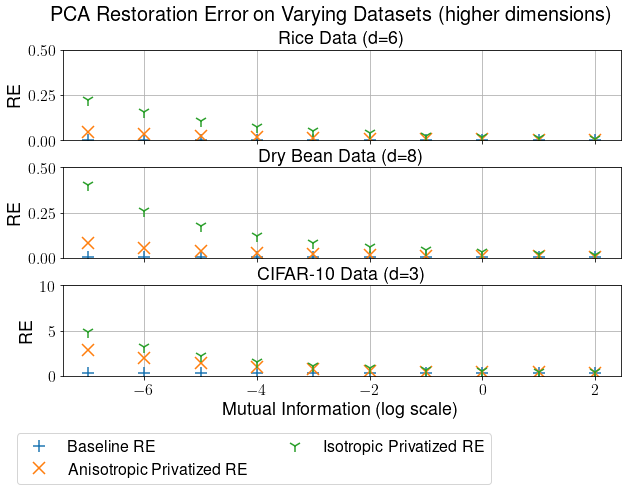

In [25]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
baseline_vals = [0.0023290993972454026, 0.00761933491456005, 0.33665230834237125]
fnames = [
    "final/rice_pca_dist_mi_{}.pkl",
    "final/bean_pca_dist_mi_{}.pkl",
]

iso_fnames = [
    "final/rice_iso_pca_dist_mi_{}.pkl",
    "final/bean_iso_pca_dist_mi_{}.pkl",
]

data_types = ['Rice', 'Bean', 'CIFAR-10']
titles = ["Rice Data (d=6)", "Dry Bean Data (d=8)", "CIFAR-10 Data (d=3)"]
fig, axes = plt.subplots(3, sharex=True, figsize=(10, 6))
ys = [(0, 0.5), (0, 0.5), (0, 10)]

dims = [6, 8, 3]
for ind, data in enumerate(data_types):
    tmp, iso_tmp = {}, {}
    ax = axes[ind]
    if ind < 2:
        for mi in true_x_vals:
            tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[dims[ind]]
            iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[dims[ind]]
        acc_dict = {}
        iso_acc_dict = {}
        for mi in true_x_vals:
            acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
            iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
        sorted_keys = sorted(acc_dict.keys())
        hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
        iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]

    else:
        hybrid_priv_ys = [d_aniso[dims[ind]][k][1] for k in true_x_vals]
        iso_priv_ys = [d_iso[dims[ind]][k][1] for k in true_x_vals]
    print(data)
    print('baseline', baseline_vals)
    print('aniso', [(true_x_vals[k], hybrid_priv_ys[k]) for k in range(len(hybrid_priv_ys))])
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [baseline_vals[ind]]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline RE")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized RE")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized RE")

    ax.set_ylim(ys[ind][0], ys[ind][1])

    ax.set_ylabel("RE", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)
handles, labels = ax.get_legend_handles_labels()

lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("PCA Restoration Error on Varying Datasets (higher dimensions)", fontsize=20)
plt.savefig('figs/pca_higher_dims.svg', bbox_inches = "tight")
# rice: .18 (1/8), bean: .17 (1/4), , cifar: .39 (2)

nonprivate [0.7084822434484443, 0.7084822434484443, 0.7084822434484443, 0.7084822434484443, 0.7084822434484443, 0.7084822434484443, 0.7084822434484443, 0.7084822434484443, 0.7084822434484443, 0.7084822434484443]
aniso [0.24192603477834912, 0.2739130541268676, 0.32239211364192993, 0.37919373010041657, 0.44678202302228726, 0.51636737692873, 0.5808530492285083, 0.629238550085719, 0.6622214058290455, 0.6814638746020071]
nonprivate [0.7250671075189827, 0.7250671075189827, 0.7250671075189827, 0.7250671075189827, 0.7250671075189827, 0.7250671075189827, 0.7250671075189827, 0.7250671075189827, 0.7250671075189827, 0.7250671075189827]
aniso [0.7059027675728636, 0.7077041391133974, 0.7098782757776141, 0.7135182463874611, 0.7161920156747503, 0.7191849130541264, 0.7218430075924576, 0.7225326965466564, 0.7244364437913312, 0.7250115111437685]


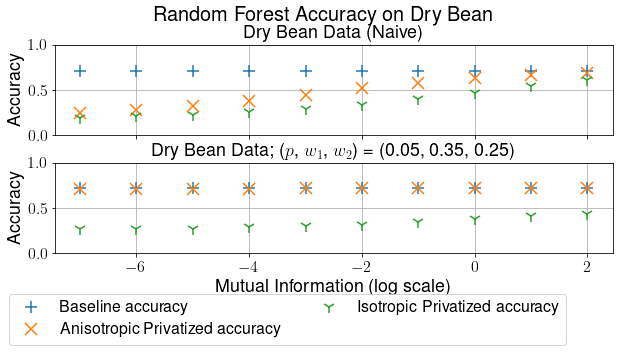

In [26]:
true_x_vals = [1/128., 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
# print(true_x_vals)
# kmeans_mi=0.125_iris_acc.pkl
regs = [(None, 0.0, 1.0), (0.05, 0.35, 0.25)]
# max precision, reg param, weight orig in code
# max precision, 1-weight orig, reg param in writing
fnames = ["final/bean_iso=False_acc_auto_reg=(None, 0.0, 1.0)_mi={}_norm=minmax.pkl",
          "final/bean_iso=False_acc_auto_reg=(0.05, 0.25, 0.65)_mi={}_norm=standard_no_std.pkl"]
iso_fnames = ["final/bean_iso=True_acc_auto_reg=(None, 0.0, 1.0)_mi={}_norm=minmax.pkl",
          "final/bean_iso=True_acc_auto_reg=(0.05, 0.25, 0.65)_mi={}_norm=standard_no_std.pkl"]

data_types = ['bean', 'bean']
titles = ["Dry Bean Data (Naive)", "Dry Bean Data; ($p$, $w_1$, $w_2$) = (0.05, 0.35, 0.25)"]
fig, axes = plt.subplots(2, sharex=True, figsize=(10, 4))

baseline_vals = [0.7134459955914768, 0.7193240264511389]

# max precision, reg_param, weight_orig in code; max_precision, weiight_orig, reg_param in text

for ind, data in enumerate(data_types):
#     if ind == 0: continue
    tmp, iso_tmp = {}, {}
    for mi in true_x_vals:
        tmp[mi] = pickle.load(open(fnames[ind].format(mi), 'rb'))[mi]
        iso_tmp[mi] = pickle.load(open(iso_fnames[ind].format(mi), 'rb'))[mi]
    ax = axes[ind]
    acc_dict = {}
    iso_acc_dict = {}
    for mi in true_x_vals:
        acc_dict[mi] = (tmp[mi][0], tmp[mi][1])
        iso_acc_dict[mi] = (iso_tmp[mi][0], iso_tmp[mi][1])
    sorted_keys = sorted(acc_dict.keys())
    subsampling_ys = [max(acc_dict[k][0] for k in sorted_keys)]*len(sorted_keys)
    hybrid_priv_ys = [acc_dict[k][1] for k in sorted_keys]
    print('nonprivate', subsampling_ys)
    print('aniso', hybrid_priv_ys)
    iso_priv_ys = [iso_acc_dict[k][1] for k in sorted_keys]
    
    transformed_x_vals = [np.log2(x) for x in true_x_vals]
    baseline_ys = [max(baseline_vals[ind], subsampling_ys[0])]*len(sorted_keys)
    ax.plot(transformed_x_vals, baseline_ys, '+', markersize=12, mew=1.5, label="Baseline accuracy")
    ax.plot(transformed_x_vals, hybrid_priv_ys, 'x', markersize=12, mew=1.5, label="Anisotropic Privatized accuracy")
    ax.plot(transformed_x_vals, iso_priv_ys, '1', markersize=12, mew=1.5, label="Isotropic Privatized accuracy")
    y_min, y_max = 0., 1.0
    ax.set_ylim(y_min, y_max)

    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(titles[ind], fontsize=18)
    ax.grid(True)
    ax.tick_params(axis='both', labelsize=16)
plt.subplots_adjust(hspace=0.3)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Mutual Information (log scale)", fontsize=18)
plt.suptitle("Random Forest Accuracy on Dry Bean", fontsize=20)
plt.savefig('figs/dry_bean_dt.svg', bbox_inches='tight')

# Iris Variance

In [15]:
var_estimates = {}

fnames = ['final/iris_ys.pkl',
         'final/iris_svm_ys_C=1.0.pkl',
         'final/iris_svm_ys_C=1e-06.pkl']

for ind in range(len(fnames)):
    d = pickle.load(open(fnames[ind], 'rb'))[0]
    print(ind)
    var_pref = []
    for i in range(10, len(d)):
        var_pref.append(np.var(d[:i]))
    var_estimates[ind] = var_pref


0
1
2


In [16]:
var_estimates[2]

[8.593809195511196e-11,
 7.997309643329533e-11,
 7.483032547048374e-11,
 7.038945285903073e-11,
 6.691327156151522e-11,
 7.403338758668412e-11,
 6.991217192875432e-11,
 6.580504423684816e-11,
 6.730471643976231e-11,
 6.653532315020563e-11,
 7.190522479189011e-11,
 7.079162220598092e-11,
 7.461122755367353e-11,
 8.371003130971998e-11,
 8.167551171958337e-11,
 7.901866542142186e-11,
 7.805129373177895e-11,
 7.52822502022809e-11,
 7.723810508024083e-11,
 7.462268856765342e-11,
 7.219808129299726e-11,
 7.204869552339418e-11,
 7.014148409493948e-11,
 6.821175908414403e-11,
 6.860054548737389e-11,
 6.769578414673647e-11,
 6.820637818321684e-11,
 7.54714554835112e-11,
 7.422989105866377e-11,
 7.233322465335989e-11,
 7.203237597988412e-11,
 7.037518541638872e-11,
 7.145604009979955e-11,
 7.136028032317744e-11,
 6.974071081780702e-11,
 6.926244386399375e-11,
 6.86317237655026e-11,
 6.726727886686285e-11,
 6.70385104265755e-11,
 6.648758611705672e-11,
 6.540915399941041e-11,
 6.457629447884636e-

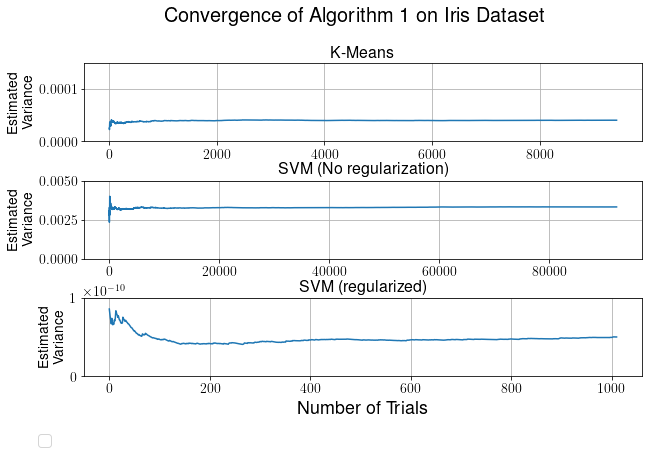

In [17]:


titles = ["K-Means", "SVM (No regularization)", "SVM (regularized)"]
fig, axes = plt.subplots(3, figsize=(10, 6))
ys = [(0, 1.5e-4), (0, 0.005), (0, 1*10**(-10))]

for ind in range(len(fnames)):

    ax = axes[ind]
    ax.plot(var_estimates[ind])

    ax.set_ylabel("Estimated\nVariance", fontsize=14)
    ax.set_title(titles[ind], fontsize=16)
    ax.grid(True)
    ax.set_ylim(ys[ind][0], ys[ind][1])
    ax.tick_params(axis='both')
    ax.tick_params(axis='both', labelsize=14)
    ax.yaxis.get_offset_text().set_fontsize(14)
plt.subplots_adjust(hspace=0.5)

handles, labels = ax.get_legend_handles_labels()
plt.subplots_adjust(top=0.85)


lgd = fig.legend(handles, labels, ncol=2, loc=2, prop={'size': 16}, bbox_to_anchor=(0.05, 0.01))
plt.xlabel("Number of Trials", fontsize=18)
plt.suptitle("Convergence of Algorithm 1 on Iris Dataset", fontsize=20)
plt.savefig('figs/alg_convergence.svg', bbox_inches='tight')

In [ ]:
for ind in var_estimates:
    print(ind, len(var_estimates[ind]))